In [31]:
import operator
from copy import deepcopy
from lsst.afw.math import afwMath
import lsst.afw.image as afwImage
import lsst.daf.persistence as dafPersist
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

In [19]:
def get_weight( calexp):

    statsCtrl = afwMath.StatisticsControl()
    statsCtrl.setNumSigmaClip(3.0)
    statsCtrl.setNumIter(2)
    statsCtrl.setAndMask(afwImage.MaskU.getPlaneBitMask(['NO_DATA', 'BAD', 'EDGE', 'SAT']))
    statsCtrl.setNanSafe(True)



    maskedImage = calexp.getMaskedImage()
    statObj = afwMath.makeStatistics(maskedImage.getVariance(), maskedImage.getMask(), afwMath.MEANCLIP, statsCtrl)
    meanVar, meanVarErr = statObj.getResult(afwMath.MEANCLIP)
    weight = 1 / float(meanVar)
    return weight


In [15]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Production/"
butler = dafPersist.Butler(DATADIR+"tests_reroll")
tempexps = butler.subset("deepCoadd_tempExp", dataId={"filter":"r","tract":0, "patch":"5,13", "runId":"05AL01"})

In [21]:
for t in tempexps:
    if butler.datasetExists("deepCoadd_tempExp", dataId= t.dataId):
        texp = butler.get("deepCoadd_tempExp", dataId= t.dataId)
        print t.dataId["visit"] , get_weight(texp)

780352 0.00655322407641
780353 0.00806187789321
780354 0.00610761389171
780355 0.00550567367018
780356 0.00717971679118
780829 0.00432965432967
780830 0.00545247424064
780832 0.0040942535527
780833 0.00394529164644
780834 0.00516250697001
780835 0.00597633679917
781475 0.0064990615778
781476 0.00801313880906
781477 0.00579778540227
781478 0.00506196795224
781479 0.00634209594019
784257 0.00457400998695
784259 0.00562349569762
784260 0.00431401149755
784261 0.00380604668248
784262 0.00495642780633
784394 0.00548362913687
784514 0.00636334799436
784515 0.00789509610647
784516 0.00589728872247
784517 0.00531139746432
784518 0.00667712344219
787671 0.00188559740242
787673 0.00163436707209
787674 0.00108735195448
787675 0.000932295752989
787676 0.00132419331733
787677 0.00139963919234
788099 0.00355480417164
788100 0.00452822972275
788101 0.00331416799024
788103 0.00297245722406
788104 0.00400562784973
788482 0.00595297475227
788483 0.00749060742531
788484 0.00550348015622
788485 0.00478204

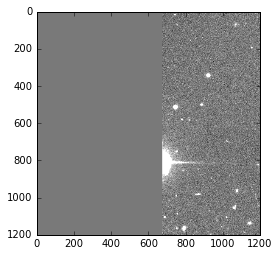

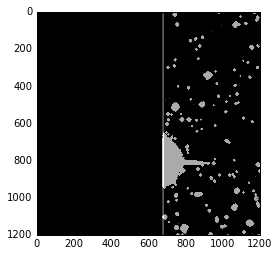

In [89]:
mi = texp.getMaskedImage()
im = mi.getImage()
imarray = im.getArray()
plt.imshow(imarray, cmap="gray", vmin= imarray.mean()-imarray.std(), vmax = imarray.mean()+imarray.std())
plt.show()
plt.imshow(mi.getMask().getArray(), cmap="gray")
plt.show()

In [87]:
maskarray = mi.getMask().getArray()

ndata = afwImage.MaskU.getPlaneBitMask(['BAD'])

newarray = deepcopy(maskarray)

newarray[newarray & ndata != 0] = 1000

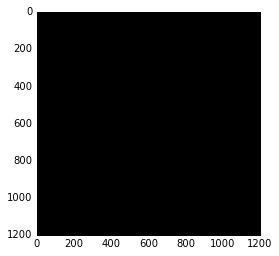

In [88]:
plt.imshow(newarray, vmin=999, vmax=1000, cmap="gray")
plt.show()

In [63]:
mu = afwImage.MaskU
mu.getMaskPlaneDict(mi.getMask())

{u'BAD': 0L,
 u'CLIPPED': 9L,
 u'CR': 3L,
 u'DETECTED': 5L,
 u'DETECTED_NEGATIVE': 6L,
 u'EDGE': 4L,
 u'INTRP': 2L,
 u'NOT_DEBLENDED': 10L,
 u'NO_DATA': 8L,
 u'SAT': 1L,
 u'SUSPECT': 7L,
 u'UNMASKEDNAN': 11L}

In [17]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Production/"
butlerc = dafPersist.Butler(DATADIR+"control_reroll")
tempexps_c = butlerc.subset("deepCoadd_tempExp", dataId={"filter":"r","tract":0,  "runId":"05AL01"})

RuntimeError: Cannot look up skymap key 'patch'; it must be explicitly included in the data ID

In [ ]:
for t in tempexps_c:
    print t.dataId